# SEE125: Roots of Equations 

## Here fill in:
- **Group Nr.**: 47
- **Names**: Savinjith Walisadeera, Adam Herbertsson, Tobias Riedel

### In this set of exercises you will:
- Implement multiple techniques to determine the root(s) of a non-linear function of 1 variable.
- Implement the same methods to determine the extremas (minimum/maximum).

#### The learning objectives are:
- Being able to find the roots of a one-variable function with the bisection, secant, and Newton's method.
- Using the eigenvalue method to find multiple roots in one go.
- Having experimented with the *fsolve* routine in python.


In [1]:
# Initialisation code for the notebook
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Bisection method
The most straightforward method to find a root of any function is the bisection method (or binary search method). To practice this you are going to find the maximum of a function.

Planck's radiation law tells us that the intensity of radiation per unit area and per unit wavelength $\lambda$
from a black body at temperature $T$ is 
\begin{equation}
  I(\lambda) = {2\pi hc^2\lambda^{-5}\over\text{e}^{hc/\lambda k_BT}-1}\,,
\end{equation}
where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant. The wavelength $\lambda$ at which the emitted radiation is strongest is the solution of the equation 
\begin{equation}
5 \text{e}^{-hc/\lambda k_BT} + {hc\over\lambda k_BT} - 5 = 0.
\end{equation}
With the substitution $x=hc/\lambda k_BT$ we find that (this is the non-linear equation you need to solve):
\begin{equation}\label{eq:plackder}
5 \text{e}^{-x} + x - 5 = 0.
\end{equation}
From which we find the Wien displacement law
\begin{equation}
\lambda = {b\over T} \, ,
\end{equation}
where the so-called Wien **displacement constant** is $b=hc/k_Bx$, and $x$ is the solution to the non-linear equation.

Write a program to solve this equation for  $x$ to an accuracy of $\epsilon=10^{-6}$ using the bisection/binary search method. Print the values $a$, $b$, the estimate of the root, and the error during the while loop iterations. Calculate and print the value for the found displacement constant. 
Follow the steps below when making this exercise.
* Write a Python function for the equation that you want to solve
* Make a plot of the function in to get a rough idea what the interval the interval is in which the root is located.
* Test that your function definition gives the correct function value
* Chose your interval $[a, b]$. Discard the obvious solution $x$=0 and check in your code that there is actually a root in the interval using an ```if``` statement
* Implement the bisection method
* Plot the values of $a$, $b$, $xsol$ (the approximate solution at each step), and the error to the command line at every iteration

Save your final solution as variable `xsol` (the value should be close to 5).

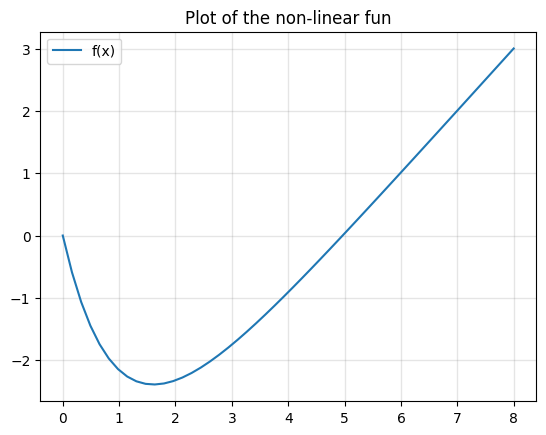

[ a=4 	 b=5.0 	 xsol=5.0 	 err=1.0 ]
[ a=4.5 	 b=5.0 	 xsol=4.5 	 err=0.5 ]
[ a=4.75 	 b=5.0 	 xsol=4.75 	 err=0.25 ]
[ a=4.875 	 b=5.0 	 xsol=4.875 	 err=0.125 ]
[ a=4.9375 	 b=5.0 	 xsol=4.9375 	 err=0.0625 ]
[ a=4.9375 	 b=4.96875 	 xsol=4.96875 	 err=0.03125 ]
[ a=4.953125 	 b=4.96875 	 xsol=4.953125 	 err=0.015625 ]
[ a=4.9609375 	 b=4.96875 	 xsol=4.9609375 	 err=0.0078125 ]
[ a=4.96484375 	 b=4.96875 	 xsol=4.96484375 	 err=0.00390625 ]
[ a=4.96484375 	 b=4.966796875 	 xsol=4.966796875 	 err=0.001953125 ]
[ a=4.96484375 	 b=4.9658203125 	 xsol=4.9658203125 	 err=0.0009765625 ]
[ a=4.96484375 	 b=4.96533203125 	 xsol=4.96533203125 	 err=0.00048828125 ]
[ a=4.965087890625 	 b=4.96533203125 	 xsol=4.965087890625 	 err=0.000244140625 ]
[ a=4.965087890625 	 b=4.9652099609375 	 xsol=4.9652099609375 	 err=0.0001220703125 ]
[ a=4.965087890625 	 b=4.96514892578125 	 xsol=4.96514892578125 	 err=6.103515625e-05 ]
[ a=4.965087890625 	 b=4.965118408203125 	 xsol=4.965118408203125 	 err=3.051

In [2]:
# BEGIN SOLUTION (feel free to use more than this one code cell!)
#from math import *
from matplotlib import pyplot as plt
import numpy as np

# Function
def f(x):
  return 5*np.exp(-x)+x-5

# Plotting
x = np.linspace(0, 8, 50)
plt.plot(x, f(x), label='f(x)')
plt.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
plt.legend()
plt.title('Plot of the non-linear fun')
plt.show()

# Finding the root
a, b = 4, 6
xsol = 0

def rootExistsInInterval(i, j):
  return (f(i) < 0 and f(j) > 0) or (f(i) > 0 and f(j) < 0)

assert(rootExistsInInterval(a, b))

# Bisection method
while b-a > 10**-6:
  xsol = (a+b)/2
  if rootExistsInInterval(a, xsol):
    b = xsol
  else:
    a = xsol

  print('[ a={a} \t b={b} \t xsol={x} \t err={err} ]'.format(a=a, b=b, x=xsol, err=(b-a)))

print('x≈{}'.format(xsol))

#END SOLUTION

## Exercise 2: Newton's method
If the derivative of $f(x)$ is known (analytically or numerically) the most common method to solve the roots is the <a href="https://en.wikipedia.org/wiki/Newton%27s_method">Newton's (or Newton-Raphson) method</a>. 
Newton's method is an iterative method based on the Taylor series expansion of the function at first order (tangent only). We have discussed this method in class. It is often faster than the bisection method.

Consider the sixth-order polynomial
\begin{equation}
P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1.
\end{equation}
There is no general formula for the roots of a sixth-order polynomial, but one can find them easily enough using a computer. 

Make a function $P(x)$ and plot it from $x=0$ to $x=1$. Inspect the plot and find rough values for the six roots of the polynomial, the points at which the function is zero. Put the initial estimates of the roots in an array.

Write a Python program to solve for the positions of all six roots to at least ten decimal places of accuracy using Newton's method. Use the absolute difference between successive values as your error. Plot the found roots in the same figure as red round symbols.

Follow the steps below when making this exercise.
* First test that your function and derivative definition are correct
* Solve this problem for a single root
* Subsequently add a for loop to find all roots

To add the roots to the initial figure use `fig, ax=plt.subplots()` before you make your initial plot (above) with `ax.plot(x,P(x), '-b')`. Subsequently, you can add the found roots in the cell below by using `ax.plot(xroot, P(xroot), 'or')` in your for loop. Save an array with solutions in the variable `sol` for answer checking (it should be close to [0.03, 0.17, 0.38, 0.62, 0.83, 0.97]).

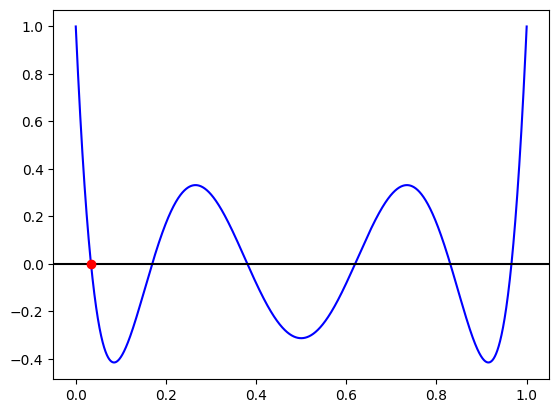

In [3]:
# BEGIN SOLUTION  (feel free to use more than this one code cell!)
import matplotlib.pyplot as plt
import numpy as np

def P(x):
    return 924*x**6 - 2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1

def dP(x):
    return 924*6*x**5 - 2772*5*x**4+3150*4*x**3-1680*3*x**2+420*2*x-42

x = np.linspace(0, 1, 10000)
fig, ax=plt.subplots()
ax.plot(x, P(x), '-b')
plt.axhline(0, color='black')


xroot = 0.1
while np.abs(P(xroot)) > 10**-5:
    h=-P(xroot)/dP(xroot)
    xroot = xroot + h


ax.plot(xroot, P(xroot), 'or')
#END SOLUTION

[0.03376473401628287, 0.1693944274297977, 0.38069018429439055, 0.6193098157055976, 0.8306055725702023, 0.9662352659837412]


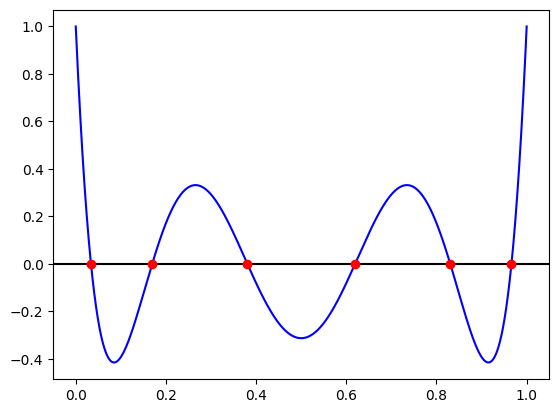

In [4]:
rootish = [0.03, 0.17, 0.38, 0.62, 0.83, 0.97]
x = np.linspace(0, 1, 10000)
fig, ax=plt.subplots()
ax.plot(x, P(x), '-b')
plt.axhline(0, color='black')

solutions= []

for xroot in rootish:
    while np.abs(P(xroot)) > 10**-5:
        h=-P(xroot)/dP(xroot)
        xroot = xroot + h
    ax.plot(xroot, P(xroot), 'or')
    solutions.append(xroot) 
print(solutions)

## Exercise 3: Root finding in physics
Now you will work with an example of root finding for an actual physics problem.

There is a special point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit. 

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite the distance $r$ from the center of the Earth to the $L_1$ point satisfies 
\begin{equation}
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r,
\end{equation}
where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, $R$ is the distance between the Earth and the Moon, and $\omega$ is the angular velocity of both the Moon and the satellite.

The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation). Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically. Write a program that uses Newton's method to solve for the distance $r$ from the Earth to the $L_1$ point. Compute a solution accurate to *at least four significant digits*.

The values of the various parameters are:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
You will also need to choose a suitable starting value for $r$.

Some tips for making this exercise
* Make a plot of the function and its derivative
* First check the values of the function and its derivative at the point where you start your search. Remember that, in Newton's method, the step size depends on the derivative. Can you see what the problem is with a straightforward implementation of the given the physical parameters? As you did during the exercises about errors, see if you can rewrite the function to avoid this problem. 
* Implement Newton's method to your modified version of the equation above and find the solution

Store your final solution in variable `lagrange` (it should be close to 325000 km).

In [5]:
import scipy.constants

G=scipy.constants.G
M=5.974e24 
m=7.348e22 
R=3.844e8 
omega=2.662e-6

#BEGIN SOLUTION

def f(r):
  return G*M/r**2 - G*m/(R-r)**2 - omega**2*r # =0

r1 = 330000000
r0 = 370000000

while (r0-r1 > 10):
  slope = (f(r1) - f(r0))/(r1-r0)
  intercept = -slope*r1+f(r1)
  r0 = r1
  r1 = -intercept/slope

print('r0={}\t r1={}'.format(r0, r1))
lagrange = (r0+r1)/2
print(lagrange)
#END SOLUTION


r0=326046378.7691307	 r1=326046378.7639041
326046378.7665174


## Exercise 4: Root finding in physics II

Finally, you should attempt to solve the problem of a mass suspended between two springs as shown here!
![Spring.png](attachment:15a2d10f-dd0f-4e39-bdd4-73d384d4c638.png)

The goal of the calculation is to find the value for the angle $\theta$ at which this system (with identical) springs is in equilibrium. This problem does not have an analytical solution.

We use the following values:
\begin{align*}
m &= 5\,\mathrm{kg}, \\
L_0 &= 0.3\,\mathrm{m}, \\
K &= 1\times 10^3\,\mathrm{N}\,\mathrm{m}^{-1}, \\
g &= 9.81\,\mathrm{m}\,\mathrm{s}^{-2}.
\end{align*}
Here $m$ is the mass of the object, $L_0$ is half the length between the two points where the springs are attached, $K$ is the spring constants, and $g$ is the acceleration due to gravity.
The equilibrium angle can then be calculated from:
\begin{equation}
\tan(\theta) - \sin(\theta) = {mg\over(2KL_0)}.
\end{equation}

 

Using the root finding methods, you should aim to calculate this with an accuracy of $\epsilon=10^{-4}$ degrees.

### 4a: bisection method

First, using the same steps as you use in Exercise 1 (plotting the function first), calculate the result using the bisection method. (Note that your values should be around 30)
If you did not do so in Exercise 1, define a function that performs the bisection method and prints out the number of iterations that are needed to reach the desired accuracy.

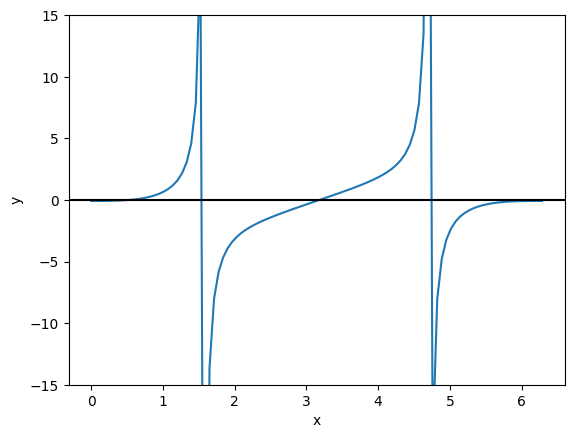

The root: 0.5328665761917746


In [6]:
#BEGIN SOLUTION
m = 5
L0 = 0.3
K = 10**3
g = 9.81
epsilon = 10**-4
theta=np.linspace(0, 2*np.pi, 100)
def f(theta):
    return np.tan(theta)-np.sin(theta)-(m*g)/(2*K*L0)

y=f(theta)

a=0
b=np.pi/4
while (b-a)/2 > epsilon:
    c = (a+b)/2
    if f(c) == 0:
        break
    if f(a)*f(c) < 0:
        b=c
    else:
        a=c
        
plt.plot(theta,y)
plt.ylim(-15,15)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.show()

print(f'The root: {c}')
#END SOLUTION

### 4b: Newton method

Now do the same using the Newton (Newton-Raphson) method.

[0.532839809270344]


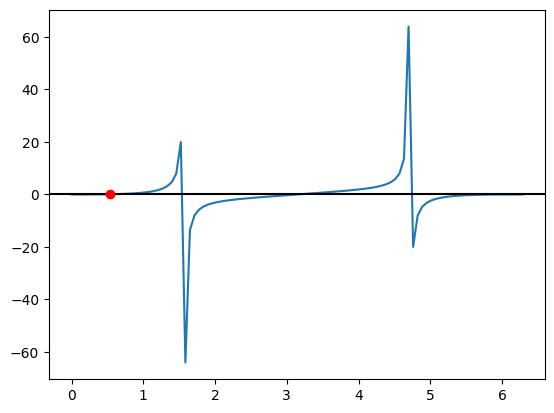

In [7]:
#BEGIN SOLUTION
import matplotlib.pyplot as plt
import numpy as np

def P(theta):
    return np.tan(theta)-np.sin(theta)-(m*g)/(2*K*L0)

def dP(theta):
    return 1/np.cos(theta)**2-np.cos(theta)

theta = np.linspace(0, 2*np.pi, 100)
y=P(theta)
plt.plot(theta, y)
plt.axhline(0, color='black')

sol= []
rootguesses = [0.5]

for xroot in rootguesses:
    while np.abs(P(xroot)) > epsilon:
        h=-P(xroot)/dP(xroot)
        xroot = xroot + h
    plt.plot(xroot, P(xroot), 'or')
    sol.append(xroot) 
print(sol)
#END SOLUTION

### 4c: Secant method

Also implement the secant method and compare the results. Which method works best?

In [8]:
#BEGIN SOLUTION
m = 5
L0 = 0.3
K = 10**3
g = 9.81
epsilon = 10**-4
theta=np.linspace(0, 2*np.pi, 100)

a, b = 1.2, 1.4

while np.abs(f(a)) > epsilon:
    lutning = (f(a)-f(b))/(a-b)
    a, b=b-f(b)/lutning, a

print(f'The root: {a}')  
#END SOLUTION

The root: 0.5328510434410667


### 4d: Using fsolve

Finally, compare all your results to the one obtained using ```scipy.optimize.fsolve```.

In [9]:
#BEGIN SOLUTION
import scipy.optimize  

def func(theta):
    return np.tan(theta)-np.sin(theta)-m*g/(2*K*L0)

root = scipy.optimize.fsolve(func, 1)
print(root)
#END SOLUTION

[0.53282627]


## Exercise 5: Benchmarking

Now it is time to benchmark the convergence of the three different root finding implementations. Remember from the lectures.  If there is a constant $m\neq0$ and a number $p$ such that:
\begin{equation}
|x_n-x^*| \leq m|x_{\rm n-1}-x^*|^p
\end{equation}
when $n$ is sufficiently large, then $m$ is called the *asymptotic error constant* and $p$ the *order of convergence*. If $p=1$ the method is *linearly convergent*, if $p=2$ it is *quadratically convergent* and when $p$ is in between it is *superlinearly* convergent.

In this exercise you should determine $p$ for the three methods (bisection method, Newton's method and the secant method). To do this, you should:
1) Define the function that you want to use. You should perform the test in the function from Exercise 3 (the Lagrange point between Earth and Moon).
2) Use the same initial guesses (for the bisection and secant method, use the same brackting interval $[a,b]$, for Newton's method, use one of the interval values $a$ or $b$). Be careful with your choices (don't pick them too close to the root because then you won't have enough points to determine $p$). 
3) Calculate using your implemented methods but this time make sure to not only produce the final value $x_*$, but an array with all intermediate $x_n$.
4) Plot the values of the difference between the 'true' value $x_*$  and the estimated value for $x$ at step $n$ against those at step $n-1$ (so plot $|x_n-x^*|$ on the y-axis and $|x_{\rm n-1}-x^*|$ on the x-axis). To approximate the true value $x_*$ you should use the final solution to get from your three different method implementations. Use a tolerance $\epsilon=10^{-8}$.
5) Perform a fit to determine $p$. You can use for example ```stats.linregress``` from the scipy package (don't forget to import it, a description is found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). Remember that you're fitting a power-low exponent, which can be fit using linear regression by using logarithmic scaling. 

**Notes** For most functions you should expect to find $p\approx 2$ for the Newton method, $p\approx 1$ for the bisect method and $p\approx 1.618$ for the secant method.
Note that you will generally not find the exact theoretical $p$ values (depending on your choice of function there will be some numerical noise in the, likely few, iterations). Additionally, for certain functions (for example the function in exercise 4) you would notice that one of the methods performs significantly worse. For the function from Exercise 3, you should find $p_{\rm secant}\sim 1.58$, $p_{\rm Newton}\sim 1.89$, $p_{\rm secant}\sim 0.98$.


Bisection:	 0.9887568639531017
Newton:	 1.5902594289539218
Secant:	 1.339428238801977


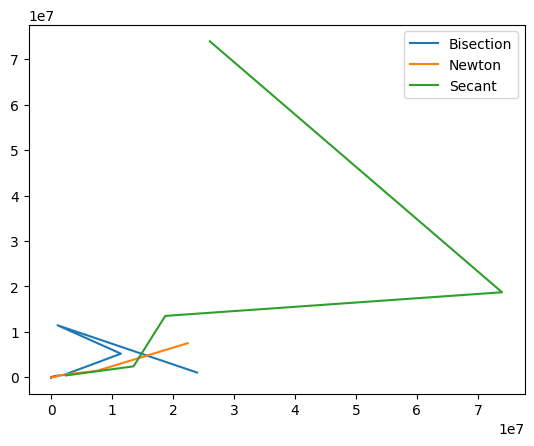

In [10]:
#BEGIN SOLUTION (feel free to use more than this one code cell!)
from scipy import stats

G=scipy.constants.G
M=5.974e24 
m=7.348e22 
R=3.844e8 
omega=2.662e-6


def f(r):
  return G*M/r**2 - G*m/(R-r)**2 - omega**2*r # =0

def rootExistsInInterval(i, j):
  return (f(i) < 0 and f(j) > 0) or (f(i) > 0 and f(j) < 0)

def bisection(a, b, f):
  x = []

  # Bisection method
  while len(x) < 2 or abs(x[-1]-x[-2]) > 10e-8:
    xsol = (a+b)/2
    if rootExistsInInterval(a, xsol):
      b = xsol
    else:
      a = xsol
    x.append(xsol)

  return x

def newton(a, b, f):
  x = []

  while len(x) < 2 or abs(x[-1]-x[-2]) > 10e-8:
    slope = (f(a) - f(b))/(a-b)
    intercept = -slope*a+f(a)
    b = a
    a = -intercept/slope
    x.append((a+b)/2)

  return x


def secant(a, b, f):
  xvals = []
  xvals.append(a)
  xvals.append(b)
  notconverge = 1
  count = 0
  while (notconverge==1):
      slope=(f(xvals[count+1])-f(xvals[count]))/(xvals[count+1]-xvals[count])
      intercept=-slope*xvals[count+1]+f(xvals[count+1])
      nextval = -intercept/slope
      if abs(f(nextval)) < 10e-8:
          notconverge=0
      else:
          xvals.append(nextval)
      count = count+1
  
  return xvals


x0 = 300000000
x1 = 400000000


###### Bisection

b = np.array(bisection(x0, x1, f))
bfinal = b[-1]
x = abs((b-bfinal)[:-1])
y = x[1:]
x = x[:-1]

plt.plot(x, y, label='Bisection')
slope, intercept, r, p, se = stats.linregress(np.log(x), np.log(y))
print('Bisection:\t', slope)

###### Newton

n = np.array(newton(x0, x1, f))
nfinal = n[-1]

x = abs((n-nfinal)[:-1])
y = x[1:-1]
x = x[:-2]

plt.plot(x, y, label='Newton')
plt.legend()
slope, intercept, r, p, se = stats.linregress(np.log(x), np.log(y))
print('Newton:\t', slope)

###### Secant

s = np.array(secant(x0, x1, f))
sfinal = s[-1]

x = abs((s-sfinal)[:-1])
y = x[1:]
x = x[:-1]

plt.plot(x, y, label='Secant')
plt.legend()
slope, intercept, r, p, se = stats.linregress(np.log(x), np.log(y))
print('Secant:\t', slope)

#END SOLUTION

## Exercise 6: Eigenvalue approach

In Exercise 2, the roots of the polynomial were solved by starting with educated guesses close to the six roots. It is also possible to calculate all six roots using an Eigenvalue approach. Follow these steps:
* First define the 'companion matrix' as defined in the lecture. (Hint: remember that you should rewrite the polynomial so that the coefficient of the highest term (so of $x^6$) is $1$).
* Use the methods (and python tools) you learned during the exercises on Eigenvalues and Eigenvectos to calculate the Eigenvector of this matrix. This will give you the roots.
* Compare the results with the roots you found in Exercise 2.


In [11]:
#BEGIN SOLUTION 
A = [[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[-1/924,42/924,-420/924,1680/924,-3150/924,2772/924]]

eigenvalues=np.linalg.eig(A)
print('Eigenvalues :',eigenvalues[0])
print('Our roots :',solutions[::-1])
#END SOLUTION

Eigenvalues : [0.96623476 0.83060469 0.61930959 0.38069041 0.16939531 0.03376524]
Our roots : [0.9662352659837412, 0.8306055725702023, 0.6193098157055976, 0.38069018429439055, 0.1693944274297977, 0.03376473401628287]


## Exercise 7: Minima/Maxima

Using again the same polynomial from Exercise 2:
\begin{equation}
P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1,
\end{equation}
you should now determine the locations of the *minima* and *maxima* using Newton's method. Write out which $x_i$ is a minimum and which is a maximum. 


0.9151120250355087 is a local minimum
0.734424423839119 is a local maximum
0.5000023286613244 is a local minimum
0.08488660952128184 is a local minimum
0.26557458830055486 is a local maximum


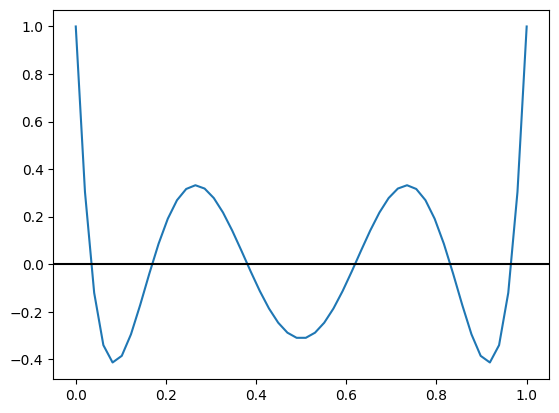

In [12]:
#BEGIN SOLUTION (feel free to use more than this one code cell!)

def F(x):
  return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def dF(x):
  return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

def ddF(x):
  return 27720*x**4 - 55440*x**3 + 37800*x**2 - 10080*x + 840

def rootOf(f, r1, r0):
  while (abs(r0-r1) > 1e-5):
    slope = (f(r1) - f(r0))/(r1-r0)
    intercept = -slope*r1+f(r1)
    r0 = r1
    r1 = -intercept/slope

  return (r0+r1)/2


x = np.linspace(0, 1, 50)
plt.plot(x, F(x))
plt.axhline(0, color='black')

'''
# Alternative method to find roots but reaches maximum recursion depth

# Roots
R = []
F = [dF]

for i in range(0, 2):
  r1 = -1
  r0 = 1

  R1 = rootOf(F[i], r1, r0)
  R.append(R1)
  F.append(lambda x : F[i](x)/(x-R1))

print(R)
'''

R = []

r1 = -1
r0 = 1
R1 = rootOf(dF, r1, r0)
R.append(R1)
def dF2(x):
  return dF(x)/(x-R1)

r1 = -1
r0 = 1
R2 = rootOf(dF2, r1, r0)
R.append(R2)
def dF3(x):
  return dF2(x)/(x-R2)

r1 = -1
r0 = 1
R3 = rootOf(dF3, r1, r0)
R.append(R3)
def dF4(x):
  return dF3(x)/(x-R3)

r1 = -1
r0 = 1
R4 = rootOf(dF4, r1, r0)
R.append(R4)
def dF5(x):
  return dF4(x)/(x-R4)

r1 = -1
r0 = 1
R5 = rootOf(dF5, r1, r0)
R.append(R5)
def dF6(x):
  return dF5(x)/(x-R5)


#print(R1, R2, R3, R4, R5)


# Root classification
def classification(R):
  if ddF(R) > 0:
    print('{} is a local minimum'.format(R))
  else:
    print('{} is a local maximum'.format(R))

classification(R1)
classification(R2)
classification(R3)
classification(R4)
classification(R5)

#END SOLUTION